## importing the Required Librarys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

In [2]:
fake = pd.read_csv("fake.csv")
true = pd.read_csv("true.csv")

In [3]:
# Assigning the target to the dataset
fake['class'] = 0
true ['class'] = 1

In [4]:
print("Fake data Column Names :",fake.columns)
print("True data Column Names :",true.columns)

Fake data Column Names : Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')
True data Column Names : Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')


In [5]:
print("Fake data Information :",fake.info())
print("True data Information :",true.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   class    23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB
Fake data Information : None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   class    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB
True data Information : None


In [6]:
print("Fake data Information :\n",fake.isnull().sum())
print("True data Information :\n",true.isnull().sum())

Fake data Information :
 title      0
text       0
subject    0
date       0
class      0
dtype: int64
True data Information :
 title      0
text       0
subject    0
date       0
class      0
dtype: int64


In [7]:
# Removing the last 10 rows for manual testing
fake_manual_testing = fake.tail(10)
for i in range(23480,23470,-1):
    fake.drop([i],axis = 0, inplace = True )
    
true_manual_testing = true.tail(10)
for i in range(21416,21406,-1):
    true.drop([i],axis = 0, inplace = True )
    

In [8]:
fake_manual_testing['class'] = 0
true_manual_testing['class'] = 1

C:\Users\G.S.V.Mohan.Kadari\AppData\Local\Temp\ipykernel_5864\3995659261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_manual_testing['class'] = 0
C:\Users\G.S.V.Mohan.Kadari\AppData\Local\Temp\ipykernel_5864\3995659261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_manual_testing['class'] = 1


In [9]:
# mearging the 2 datasets
df = pd.concat([fake,true],axis = 0)
df

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21402,Exclusive: Trump's Afghan decision may increas...,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,worldnews,"August 22, 2017",1
21403,U.S. puts more pressure on Pakistan to help wi...,WASHINGTON (Reuters) - The United States sugge...,worldnews,"August 21, 2017",1
21404,Exclusive: U.S. to withhold up to $290 million...,WASHINGTON (Reuters) - The United States has d...,worldnews,"August 22, 2017",1
21405,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD (Reuters) - Outlining a new strategy...,worldnews,"August 22, 2017",1


In [10]:
df.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [11]:
df.shape

(44878, 5)

subject
Government News     1570
Middle-east          768
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10135
Name: text, dtype: int64


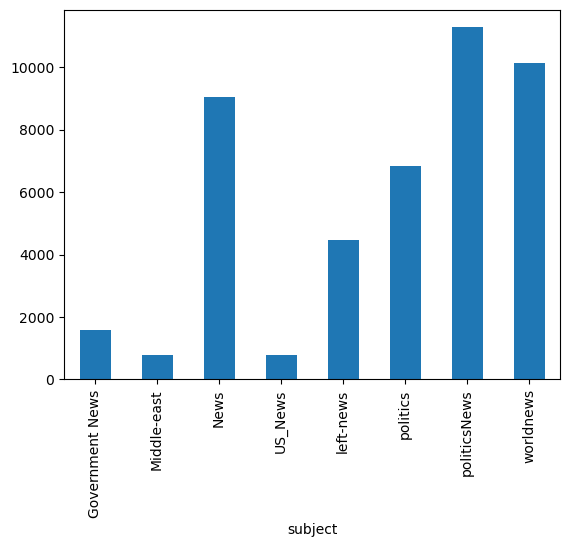

In [12]:
print(df.groupby(['subject'])['text'].count())
df.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

In [12]:
df['Text'] = df['title'] + ',' + df['text']

In [13]:
# Droping the Unvanted Columns in the dataset
data = df.drop(['title','subject','date','text'],axis = 1)

In [14]:
data.columns

Index(['class', 'Text'], dtype='object')

In [15]:
# Random Shuffil of the dataset
data = data.sample(frac = 1)

In [16]:
#Removing the index
data.reset_index(inplace = True )
data.drop(["index"],axis = 1 , inplace = True)

In [18]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [19]:
ps = PorterStemmer()
ps

<PorterStemmer>

In [20]:
# cresting the function for removing the special characters
def word_drop(text):
    text = text.lower()
    text = re.sub('\[.*?\]',' ',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+','',text)
    #text = re.sub('[%s]'% re.escape(string.punctuation),'',text)
    #text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*','',text)
    return text



In [21]:
data['Text'] = data["Text"].apply(word_drop)  

In [22]:
#Creating the Dependent and Independent Variables
x = data['Text']
y = data['class']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 )

In [25]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [26]:
v = TfidfVectorizer()
xv_train = v.fit_transform(x_train)
xv_test = v.transform(x_test)

In [27]:
xv_train.shape

(35902, 97809)

In [28]:
xv_test.shape

(8976, 97809)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()
lr.fit(xv_train,y_train)

LogisticRegression()

In [31]:
xlr = lr.score(xv_test,y_test)
ylr = lr.score(xv_train,y_train)
print("Model Testing Accuracy --->",xlr)
print("Model Training Accuracy --->",ylr)

Model Testing Accuracy ---> 0.9878565062388592
Model Training Accuracy ---> 0.991811041167623


In [32]:
import pickle

In [33]:
pickle.dump(v,open('vector.pkl','wb'))
pickle.dump(lr,open('model.pkl','wb'))

In [34]:
vector_form = pickle.load(open('vector.pkl','rb'))
vector_form

TfidfVectorizer()

In [35]:
load_model = pickle.load(open('model.pkl','rb'))
load_model

LogisticRegression()

In [36]:
'''def fake_news(news):
    news = word_drop(news)
    input_data = [news]
    vector_form1 = v.transform(input_data)
    preddections = load_model.predict(vector_form1)
    predicted_class = preddections[0]
    return predicted_class'''
    

def fake_news(news):
    news = word_drop(news)
    ##
    # Check if the input becomes empty after preprocessing
    if not news or news.isspace(): 
        return "invalid"
    ##
    input_data = [news]
    vector_form1 = vector_form.transform(input_data)
    prediction = load_model.predict(vector_form1)
    return prediction

In [37]:
a = str(input())
fake_news(a)
if a == 0:
    print("Fake")
else:
    print("True")

onald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this de

In [38]:
if a == 0:
    print("Fake")
else:
    print("True")
    

True
